In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats

In [18]:
df = pd.read_csv(r"marketing_data.csv")
# print(df)
df['Income'] = df[' Income '].str.replace(r'[\$,]', '', regex=True).astype(float)
df.drop(columns=[' Income '], inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [19]:
df['Education'] = df['Education'].str.strip().str.title()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.title()
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.median()))
# print(df['Income'])

In [20]:
df['Age'] = 2025 - df['Year_Birth']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

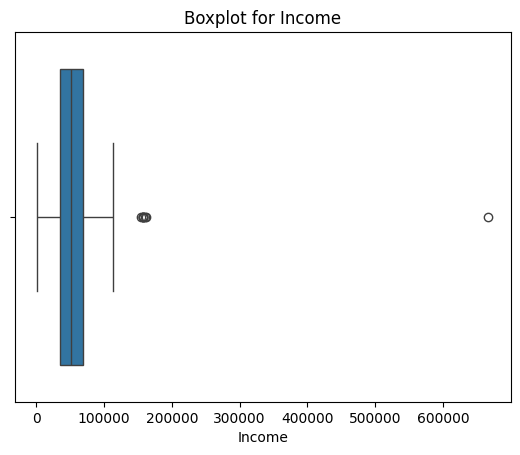

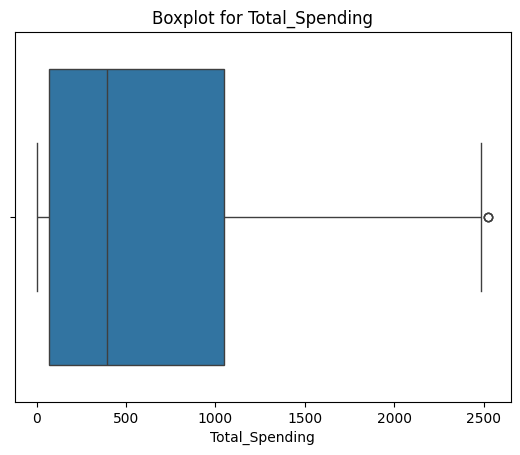

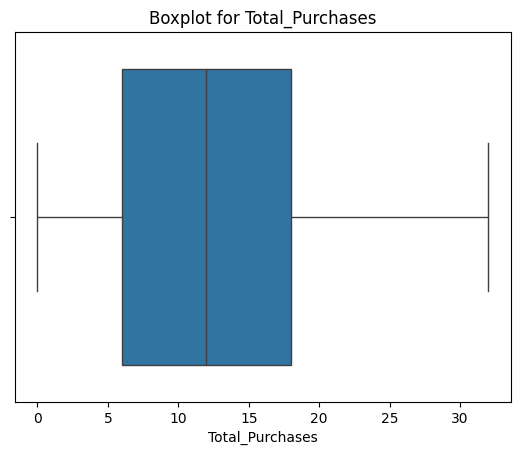

In [21]:
for col in ['Income', 'Total_Spending', 'Total_Purchases']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    
    # Outlier capping using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)


In [22]:
ordinal_encoder = OrdinalEncoder()
df[['Education']] = ordinal_encoder.fit_transform(df[['Education']])
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True)

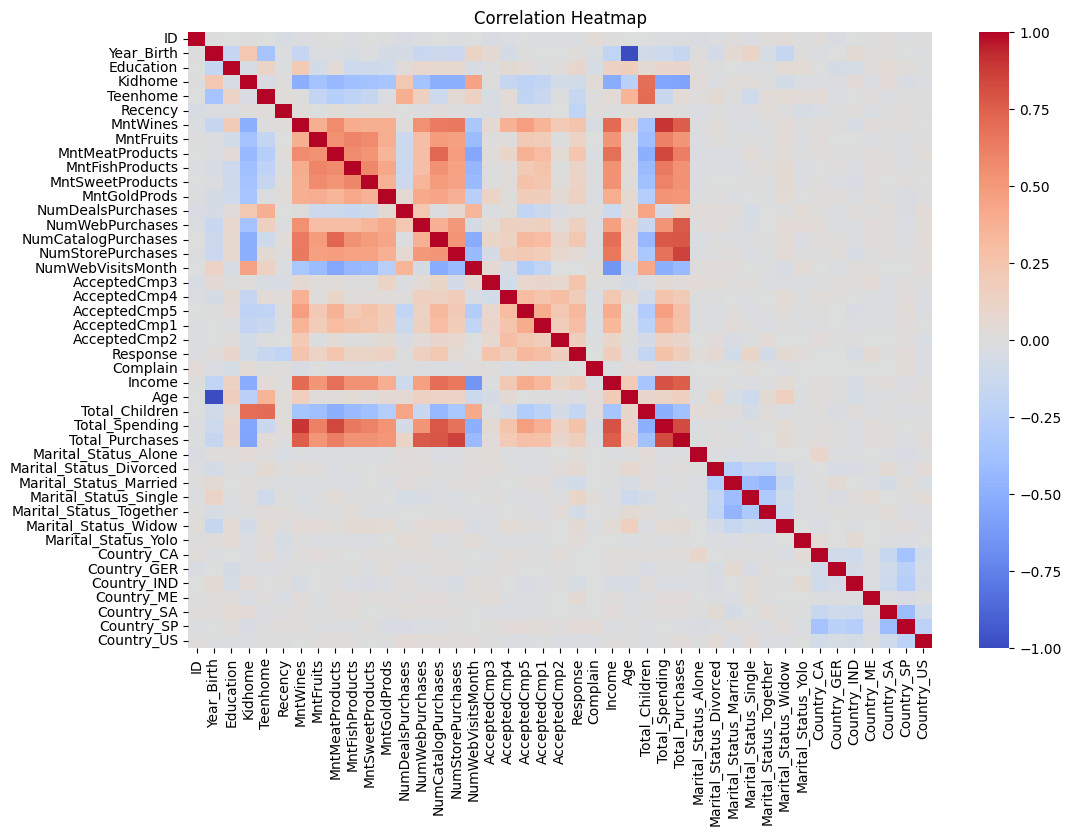

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
older = df[df['Age'] > df['Age'].median()]
younger = df[df['Age'] <= df['Age'].median()]
print("Store Purchases (Older vs Younger):", stats.ttest_ind(older['NumStorePurchases'], younger['NumStorePurchases']))

Store Purchases (Older vs Younger): TtestResult(statistic=6.334764651957808, pvalue=2.864558561083143e-10, df=2238.0)


In [26]:
parents = df[df['Total_Children'] > 0]
non_parents = df[df['Total_Children'] == 0]
print("Web Purchases (Parents vs Non-Parents):", stats.ttest_ind(parents['NumWebPurchases'], non_parents['NumWebPurchases']))

Web Purchases (Parents vs Non-Parents): TtestResult(statistic=-3.324463087423873, pvalue=0.0009001778860238199, df=2238.0)


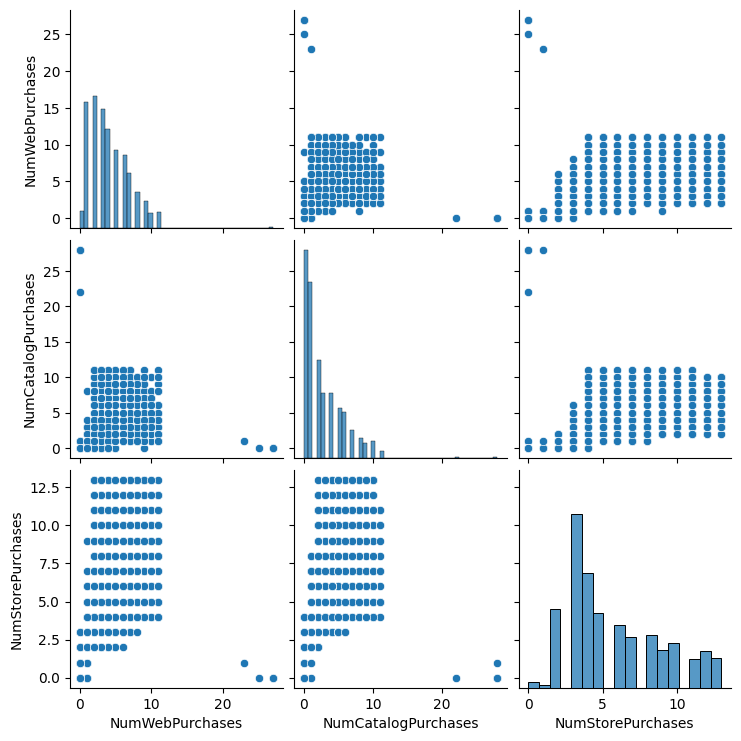

In [27]:
sns.pairplot(df, vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])
plt.show()

In [28]:
if 'Country_US' in df.columns:
    us = df[df['Country_US'] == 1]['Total_Purchases']
    non_us = df[df['Country_US'] == 0]['Total_Purchases']
    print("US vs Others Purchase Volume:", stats.ttest_ind(us, non_us))

US vs Others Purchase Volume: TtestResult(statistic=1.4512386847675383, pvalue=0.14685355981832418, df=2238.0)


In [29]:
print("\nProduct Revenue:")
print(df[spending_cols].sum().sort_values(ascending=False))


Product Revenue:
MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


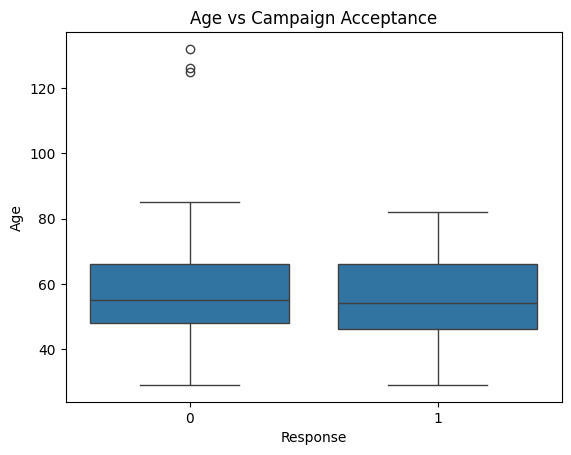

In [30]:
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Age vs Campaign Acceptance")
plt.show()

In [32]:
response_by_country = df[df['Response'] == 1].filter(like='Country_').sum().sort_values(ascending=False)
print("\nTop Responding Country:\n", response_by_country)


Top Responding Country:
 Country_SP     176
Country_SA      52
Country_CA      38
Country_GER     17
Country_IND     13
Country_US      13
Country_ME       2
dtype: int64


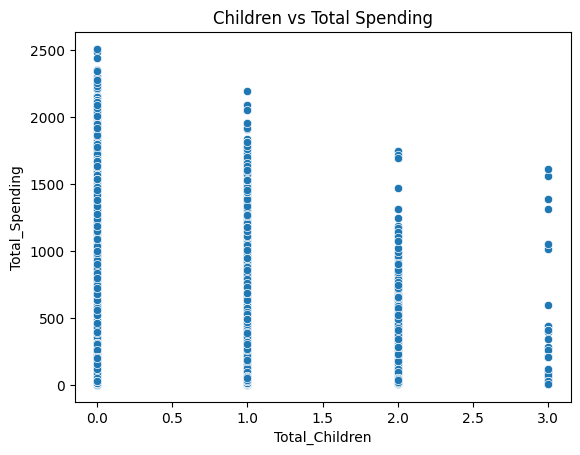

In [33]:
sns.scatterplot(x='Total_Children', y='Total_Spending', data=df)
plt.title("Children vs Total Spending")
plt.show()

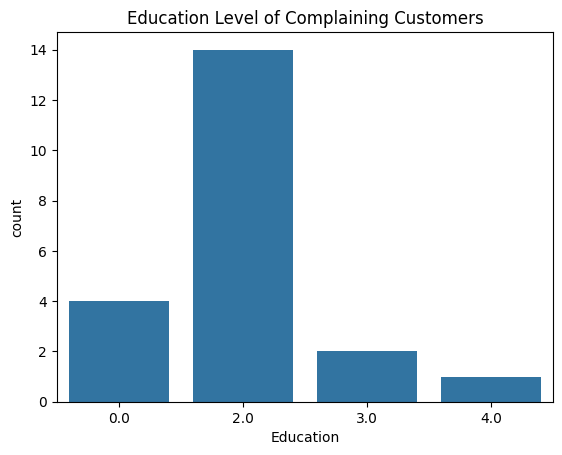

In [34]:
sns.countplot(x='Education', data=df[df['Complain'] == 1])
plt.title("Education Level of Complaining Customers")
plt.show()